<a href="https://colab.research.google.com/github/HarryWang0619/Quantum-Computing/blob/main/Haochen_Wang_Lab_2_Rabi_oscillations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 397 QC

## Introduction to Quantum Computing – Spring 2022

Instructor – Professor Robert Niffenegger (rniffenegger@umass.edu ) Marcus 215B

Lectures - Marston Hall room 211 

Labs -  Engineering Lab 307

Time – MWF 12:20-1:10

Teaching Assistant – Ivan Williams ( inwilliams@umass.edu ) 


---

### Textbook
>Quantum Computation and Quantum Information , Authors:	Michael A. Nielsen, Isaac L. Chuang


##Supporting Materials: 

### Quantum Optics:

•	Ivan H. Deutsch’s Notes
http://info.phys.unm.edu/~ideutsch/Classes/Phys566F21/ 

•	Daniel Steck’s Notes
https://atomoptics.uoregon.edu/~dsteck/teaching/quantum-optics/

###Quantum Computation:

•	Thomas Wong’s Textbook:
https://www.amazon.com/Introduction-Classical-Quantum-Computing-Thomas-dp-B09QP2MYYM/dp/B09QP2MYYM/

http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e.pdf

•	IBM’s Qiskit Textbook - https://qiskit.org/textbook-beta 


#How to use this Notebook

1. Create a copy for you to edit and update the filename with your UMass username. 

2. Experiment! This notebook is just a starting point for you to explore. If you have ideas for things to try start by typing out the pseduo code first then see if you can find help to get the syntax and libraries to make it work. 

3. Teamwork. Working in teams will help everyone check their code and debug errors. Please work in groups of up to three people. You may all share code but please maintain your own copy of the notebook to turn in for credit.

4. Hand written paper notebook still required. This colab notebook is a supplement to a paper notebook and the textbooks listed above. To test out ideas, check mathematical relations and linear algebra proofs and to complete exercises you will need a real physical paper notebook to do your work. Please have one and a pen/pencil handy. 
Related: Be careful not to get bogged down in the code if it is not working. Reach out to your team, the TA or me to get assistance. 

5. Programming Resources: 
  *   https://colab.research.google.com/notebooks/basic_features_overview.ipynb
  *   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  *   https://www.youtube.com/watch?v=inN8seMm7UI 
  *   https://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/qubit-dynamics.ipynb
  * FYI: Colab provides hardware acceleration with GPUs and TPUs if you go to 'Runtime>Change Runtime type'


#QuTiP

Install QuTiP using 'pip' within Colab. 


In [783]:
try:
  import qutip
except ImportError:
  print('Install Qutip')
  !pip install qutip


#Qiskit

IBM's Quantum Information Software Kit

In [784]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]

In [785]:
'''
Kaleidoscope plots Bloch spheres for Qisket 
'''
try:
  import kaleidoscope
except ImportError:
  print('Install kaleidoscope')
  !pip install -q kaleidoscope
import kaleidoscope; print(kaleidoscope.__version__)

0.0.13.dev13+42e3c1f


### Initialize

In [786]:
%matplotlib inline
import matplotlib.pyplot as plt

import qutip as qt
from qutip import *
from qutip.qip import *
from qutip import qeye, tensor, destroy, fock_dm

import numpy as np
from numpy import pi, sqrt, sin, cos

plt.style.use('dark_background') #background


#REVIEW FROM LECTURE:

##The Schrödinger equation

Although our assumption that rotations around the Bloch sphere could allow us to transition from one state to another was correct. This is actually due to the time evolution of the wavefunction set by the Schrödinger equation:

### $ \mathrm{i} \hbar \frac{\partial}{\partial t} | \,\psi (t) \rangle = \hat{H}(t) | \,\psi (t) \rangle $

Often this is referred to as the 'interaction' picture. 

The Hamiltonian ${\hat {H}}$ here describes the energy of the system and the time dependent Schrödinger equation sets how the Hamiltonian constrains the states and their dynamics. This is similar to how the Lagrangian of a classical physics system defines the energy of systems not easily described by Newtonian ($F=ma$) analysis.  

The Hamiltonion is the total energy of the system, which is a sum of the Kinetic Energy and the potential energy.

$\hat {H}=\hat {T}+\hat {V}$ ( Kinetic energy + Potential Energy)

The Kinetic energy of a wave is given by the curvature of the wave.
(Nodes in the wave do not have kinetic energy) Therefore the second derivative in space gives the kinetic energy.

####$\hat {T}=\frac {1}{2}m {v}^{2}=\frac {{\hat {p}}^{2}}{2m}= \frac {\hbar^2}{2m}\frac {\partial ^{2}}{{\partial x}^{2}}$

Generally the potential energy (the trap or box for our little quantum particle) could be time dependent V(t). 
However it can also be static. In which case the Hamiltonian ${\hat {H}}$ is also constant in time.

If the Hamiltonian is constant in time then the Schrödinger equation can be separated into a time dependent equation and a spatially dependent equation. 

### Position Dependent Schrödinger equation $|ψ(x)⟩$

#### $ E|ψ(x)⟩ =\hat{H}|ψ(x)⟩ =[\frac {\hbar^2}{2m}\frac {\partial ^{2}}{{\partial x}^{2}} + V ]|ψ(x)⟩ $

Most quantum mechanics physics courses focus on the enumerable solutions to this equation. From the harmonic oscillator to the atom. For now we will assume that we know the wavefunction solutions for our system so that we have well defined qubit states and we do not perturb the system enough to 'break' those states by changing the potential energy of the system. Further, we assume it is a close system, so that we're not losing qubits or states. 

#Lab 2 




# Time Dependent Schrödinger equation

Again, although our assumption that rotations around the Bloch sphere could allow us to transition from one state to another was correct. This is actually due to the time evolution of the wavefunction set by the Schrödinger equation:

## $ \mathrm{i} \hbar \frac{d}{d t} | \,\psi (t) \rangle = \hat{H} | \,\psi (t) \rangle $

Which, if $\hat{H}$ is constant in time, has the solution:

## $ |\Psi (t)\rangle =e^{-i{\hat {H}}t/\hbar }|\Psi (0)\rangle$




###Exercise 1 : 
Verify this is a solution (show your work).

## Unitary
The operator $ {\hat {U}}(t)=e^{-i{\hat {H}}t/\hbar }$
is known as the time-evolution operator, and it is unitary.
If the initial state is $|\Psi (0)\rangle $ 
, then the state at a later time $t$ will be given by
$|\Psi (t)\rangle ={\hat {U}}(t)|\Psi (0)\rangle $

> *Unitary $\equiv$ operator preserves the total probability amplitudes of the vectors (No states are lost, no vectors leave the 'unit sphere')*.

Unitarity is a general feature of time evolution under the Schrödinger equation. If a system is non-unitary then it is an open quantum system where the state of the electron (for instance) can decay to states not connected by the rotation with the Bloch sphere. If a system is unitary then the system is closed and there is no decay of the probability below 1. 

## Rotation operators about the Bloch basis

It is important to see that the description of the time evolution of a quantum state dicated by the time dependent Schrodinger equation is equivalent to a rotation of the state within the Bloch sphere.

$ |\Psi (t)\rangle =e^{-i{\hat {H}}t/\hbar }|\Psi (0)\rangle$

Generically for any axis P = {X,Y,Z} on the Bloch Sphere:

$R_{p}(\theta )=e^{(-i\theta P/2)}=\cos(\theta /2)I-i\sin(\theta /2)P$

Which is easier to see once we notice the similarity to the Euler identity: 

$e^{i\theta}=\cos \theta+i\sin \theta$

The rotations of the Bloch sphere about the Cartesian axes in the Bloch basis are then given by:

\begin{aligned}R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{bmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{y}(\theta )&=e^{(-i\theta Y/2)}=\cos(\theta /2)I-i\sin(\theta /2)Y={\begin{bmatrix}\cos \theta /2&-\sin \theta /2\\\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{z}(\theta )&=e^{(-i\theta Z/2)}=\cos(\theta /2)I-i\sin(\theta /2)Z={\begin{bmatrix}e^{-i\theta /2}&0\\0&e^{i\theta /2}\end{bmatrix}}\end{aligned}

In the above X,Y,Z represent the Pauli matrices:

$\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}$




## Plotting rotation about the Bloch Sphere


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.        -0.70710678j]
 [0.70710678+0.j        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning:

Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit




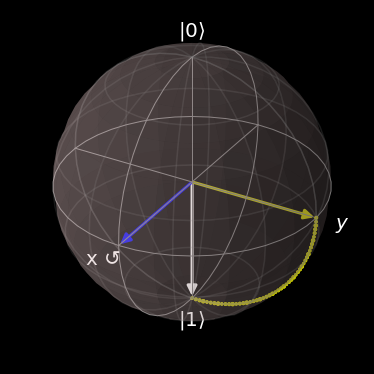

In [787]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','b'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
# b.ylabel = ['y $ \circlearrowleft $', '']
b.xlabel = ['x $ \circlearrowleft $', '' ]

# Initialize the 'down' state
psi0 = spin_state( 1/2, -1/2) 
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi * 0.5

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation about ***X axis*** in steps
  psi1 = rx(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 

# Add vector along X to represent rotation axis
b.add_vectors([1,0,0]) 

print(psi1)

b.render()


#Rotation about Z:
In lecture we constructed the Hamiltonian for an electron within a static magnetic field:

$\hat{H} = \frac{\hbar \omega}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$

This is just the Pauli Z matrix with the energy splitting of the two states from the Zeeman effect. 

$\hat{H} = \frac{\hbar \omega}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = \frac{\hbar \omega}{2} \sigma_z$

Inserted into the TDSE:

##$ |\Psi (t)\rangle =e^{-i \frac{\omega t}{2} \sigma_z }|\Psi (0)\rangle$

We see that it rotates the state about the Z axis of the Bloch sphere at a rate of the energy difference between the two states. This is just wrapping the phase of the states around as the higher energy wave function progresses faster than the lower energy state. 

![https://upload.wikimedia.org/wikipedia/commons/8/8c/Epr_splitting.png?20091207162737](https://upload.wikimedia.org/wikipedia/commons/8/8c/Epr_splitting.png?20091207162737)


To see rotation about Z we need to start in a superposition state.

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.-0.70710678j]
 [0.+0.70710678j]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning:

Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit




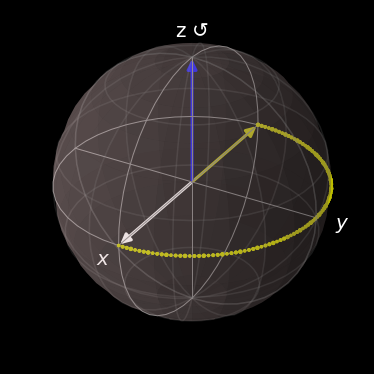

In [788]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','b'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
# b.ylabel = ['y $ \circlearrowleft $', '']
b.zlabel = ['z $ \circlearrowleft $', '' ]

'''
Initialize a super position state (+X state)
'''
psi0 = spin_state( 1/2, +1/2) + spin_state( 1/2, -1/2) 
psi0 = psi0.unit() #Normalize the new state vector
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi * 1.0

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 100)
for i in range(len(delta)):

  #Apply rotation about ***X axis*** in steps
  psi1 = rz(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 

# Add vector along Z to represent rotation axis
b.add_vectors([0,0,1]) 

print(psi1)

b.render()


We can also use quantum circuits to represent this rotation

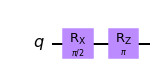

In [789]:
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector
from kaleidoscope import bloch_sphere

sim = QasmSimulator() #Set simulator to evolve state

'''
Single qubit gate with Qiskit
'''
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(1)

# Rotation about X of pi/2 to create super position state
qc.rx( 0.5*pi, 0)

# Rotation about Z of pi of on qubit 1 ( Z gate/ phase gate)
qc.rz( pi, 0)

# Draw the circuit
qc.draw('mpl')

In [790]:
compiled_circuit = transpile(qc, sim) #Compile quantum circuit
qc.save_statevector() #Save the state vector after simulation

'''
Run the simulation
'''
job = sim.run(qc, shots=100)

#Plot final states on Bloch spheres
bloch_sphere(job.result().get_statevector(qc))

#Rotation about X:

In lecture we also followed a method similar to how we construted the NOT gate to create rotations about the X axis. 

Remember from lab 1:

> To construct an operator that can flip any state (|0⟩ to |1⟩ AND |1⟩ to |0⟩) we add the outer product |1⟩⟨0|.

>$|0⟩⟨1| = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix}0 &  1\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}$

>$|0⟩⟨1| + |1⟩⟨0|= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \sigma_x$

>This X operator is logically equivalent to a NOT operation on the qubit state.
>It flips the qubit from 1 to 0 or 0 to 1. Physically it flips the spin from up to down and down to up! It is the single qubit X gate.


In lecture we saw that we can follow a similar method to construct arbtrary rotations at a set rate about X.

We will call this rate $\Omega$. 

Now coupling (rotating) between the two states at a rate $\Omega$ with that same matrix $\sigma_x$. 

Since the Hamiltonian is energy we have to add the factor of ħ to turn the rate into energy. 

### $\hat{H} = \begin{pmatrix} 0 & \frac{\hbar \Omega}{2} \\ \frac{\hbar \Omega}{2} & 0 \end{pmatrix} = \frac{\hbar \Omega}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \frac{\hbar \Omega}{2} \sigma_x$

This is the Pauli X matrix with the rate of rotation $\Omega$.

Inserted into the TDSE:

##$ |\Psi (t)\rangle =e^{-i \frac{\Omega t}{2} \sigma_x }|\Psi (0)\rangle$

We see that it rotates the state about the **X axis** of the Bloch sphere at a rate Ω.

>In the next lab we will learn how to calculate the rate Ω and it's dependence on the amplitude of applied fields. For now we'll just assume we know the rate.


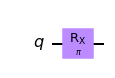

In [791]:
'''
Single qubit gate with Qiskit
'''
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.quantum_info import Statevector

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(1)

# Add a rotation of pi about X on qubit 1 ( NOT gate )
qc.rx( 1*pi , 0)

# Draw the circuit
qc.draw('mpl')

In [792]:
compiled_circuit = transpile(qc, sim) #Compile quantum circuit
qc.save_statevector() #Save the state vector after simulation

'''
Run the simulation
'''
job = sim.run(qc, shots=100)

#Plot final states on Bloch spheres
bloch_sphere(job.result().get_statevector(qc))



#Numerical integration of the Schrödinger Equation

Now we can numerically integrate the set of ordinary differential equations of the Schrödinger Equation that define the system to solve for the time evolution. 

We can use QuTiP's Schrödinger Equation evolver **'sesolve'** to perform the integration at various time steps $\delta t$ to see how the state evolves in time. 

$ |\Psi (t)\rangle =e^{-i{\hat {H}} δt /\hbar }|\Psi (0)\rangle$

Using the Hamiltonian from above, rotating about X:

### $\hat{H} =\frac{\hbar \Omega}{2} \sigma_x$


##$ |\Psi (t)\rangle =e^{-i \frac{\Omega~\delta t}{2} \sigma_x }|\Psi (0)\rangle$


##$R_{x}(\theta )=e^{(-i \frac{\theta}{2} \hat \sigma_x)} = R_{x}(\Omega ~ δt )=e^{(-i \frac{\Omega~\delta t}{2} \hat \sigma_x)}$

So before we set the angle.
NOW we set the time given a fixed rate of rotation Ω.


# Animate the rotation on the Bloch sphere


'Schrödinger Equation' Solver (sesolve):

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html#unitary-evolution

https://qutip.org/docs/latest/apidoc/functions.html#module-qutip.sesolve




In [793]:
# ''' 
# Setup input parameters
# '''
# psi0 = spin_state( 1/2, -1/2) # Initialize the 'down' state

# omega = 1 # define rotation/coupling rate in rads/s (1 rad/s)

# H = 1/2*omega*sigmax()  # set rotation axis as the X direction (sigma_x)

# # List of times for which the solver should store the state vector
# times = np.linspace(0, 4*pi, 50) # 4 'pi times' are 2 full rotations around the Bloch sphere back to the original state

# '''
# Run the 'simulation'
# '''
# result = sesolve(H, psi0, times, [])
# # result = mesolve(H, psi0, times, [], [sigmaz(), sigmay(), sigmax()])

# '''
# Store the projection measurements for each basis
# '''
# #Project the state onto the Z axis (find the expectation values)
# sz =  expect(sigmaz(), result.states)
# sy =  expect(sigmay(), result.states)
# sx =  expect(sigmax(), result.states)


# '''
# Animate on the Bloch sphere
# '''

# #Plot setup
# %matplotlib inline
# from pylab import *
# import matplotlib.animation as animation
# from mpl_toolkits.mplot3d import Axes3D
# from IPython.display import HTML

# fig = plt.figure(figsize=(7, 7))
# ax = Axes3D(fig,azim=-40,elev=30)
# sphere = Bloch(axes=ax)
# sphere.font_color = 'white'
# sphere.vector_color = ['b','y','w','y']
# sphere.point_color = ['y']

# #Animation function
# def animate(i):
#     sphere.clear()
#     sphere.vector_color = ['b','y','w','w']
#     sphere.add_vectors([1,0,0]) #Add vector on X axis representing rotation axis

#     sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]], meth='l') #Point for each step of the rotation
#     sphere.add_vectors([sx[i],sy[i],sz[i]]) #Full vector from the simulation
#     sphere.add_vectors([0,sy[i],0]) #Just the Y basis component
#     sphere.add_vectors([0,0,sz[i]]) #Just the Z basis component
#     sphere.make_sphere()
#     return ax

# def init():
#     sphere.vector_color = ['r']
#     return ax

# ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),init_func=init, blit=False, repeat=True)
# ###ani.save('bloch_sphere.mp4', fps=20)

# ### Uncomment to create animation!
# HTML(ani.to_jshtml())


In [794]:
'''
'Schrödinger Equation' Solver (sesolve)
'''

 # Initialize the 'down' state
psi0 = spin_state( 1/2, +1/2)

# define rotation/coupling rate in rads/s
omega = 1 

# Creat the Hamiltonian and set rotation axis as the X direction (sigma_x)
H = 1/2*omega*sigmax()

# List of times for which the solver should store the state vector
times = np.linspace(0, 4*pi, 50) # 4 'pi times' are 2 full rotations around the Bloch sphere back to the original state

#Integrate the diff. eqs for the times in the list --> rotate the state psi0 by H
result = sesolve(H, psi0, times, [])


Now that we have run the simulation (integrating the differential eqns of the Schrodinger Equation). 
We can plot our results.

First we'll plot the spin measured in the Z basis.

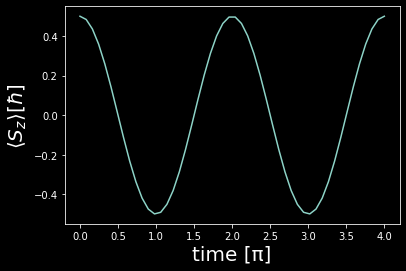

In [795]:
#Setup Plot
fig, axes = plt.subplots(1,1)
plt.style.use('default')
fig.figsize=[8,6]
axes.set_xlabel(r'time [π]', fontsize=20)
axes.set_ylabel(r'$⟨S_z⟩ [ħ]$', fontsize=20);

#Project the state onto the Z axis (find the expectation values)
expectation_values =  expect(1/2*sigmaz(), result.states)

#Plot the time dynamics of the projection along z (the expectation value)
axes.plot(times/pi, expectation_values)


## $\sigma_z $ is the 'state' basis

This plot has projected our vector state onto the original basis we'd started with ( in the 'Z' direction of our Bloch sphere )

This projects the vector on the Bloch sphere onto a 1D line along Z. This is equivalent of asking what probability the qubit is to be in each state. As the qubit state vector is rotated (by our Hamiltonion) it oscillates between likely being 'up' and likely being 'down'. 

It losses information about the relative phase of the state with respect to the pulse because the vector is now projected (like a dot product).

### The 'Z' direction of the sphere is the quantum state axis
### While the XY plane holds the phase information (complex numbers)

To actually perform the projection we ask what is the 'expectation value' in that axis. 

QuTiP requires we define that which axis we're interested in so we write 'expect(sigmaz(),result.states)' to define the z direction and that we want to project the states from our result.

Typically the expectation value is a measureable quantity. Like the spin of a particle. So we'd add the appropriate prefactors to turn the expectation value of the state vector into the measureable quantity. Here spin 1/2 or specifically ±ħ/2. 

Let's repeat the numerical integration but now ask what the projection along each basis is simultaneously.



In [796]:
result = mesolve(H, psi0, times, [], [sigmaz(), sigmay(), sigmax()])
sz=result.expect[0]
sy=result.expect[1]
sx=result.expect[2]

## Exercise 2:
In a few sentences explain if measuring along each basis simultaneously is physically possible. Why or why not?

In [797]:
# See below

What happens if we ask to plot the expectation value in the 'X' direction?

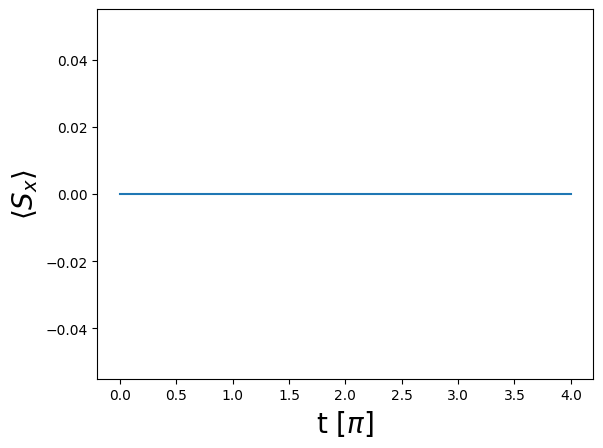

In [798]:
#Plot results

fig, axes = plt.subplots(1,1)
fig.figsize=[8,6]
plt.style.use('default')

axes.plot(times/pi,sx)

axes.set_xlabel(r't [$\pi$]', fontsize=20)
axes.set_ylabel(r'$\left< S_x\right>$', fontsize=20);

Nothing, the state is being rotated about the X axis by the Hamiltonian so there is no projection of the vector in that direction. The expectation value should remain zero.

### Plotting all projections at the same time

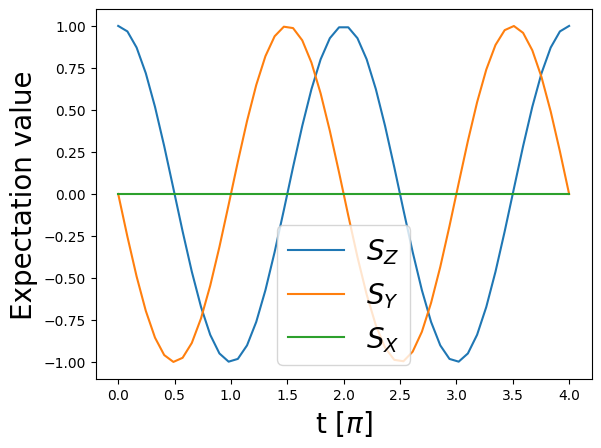

In [799]:
fig, ax = plt.subplots(1,1)
plt.style.use('default')
ax.plot(times/pi, sz);
ax.plot(times/pi, sy);
ax.plot(times/pi, sx);
ax.set_xlabel('t [$\pi$]', fontsize=20);
ax.set_ylabel('Expectation value', fontsize=20);
ax.legend(("$S_Z$", "$S_Y$", "$S_X$"), fontsize=20);


We can also ask what is the expectation value of being in the initial state.

 This gives the probability of being in the initial state $|\psi_0⟩$.

 This is referred to as a Rabi oscillation which we will expand upon in the next lab.  (https://en.wikipedia.org/wiki/Rabi_cycle)

# Halfway point of Lab 2

# State Measurement

Let's rotate a state by $\pi/2$ about X so that it is halfway between up and down, creating an equal superposition of the up state and the down state.



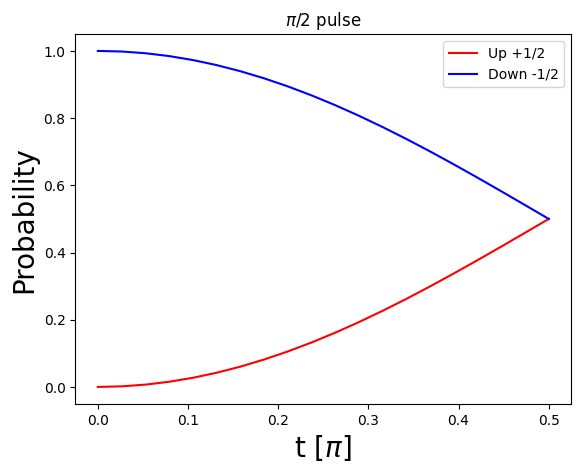

In [800]:
''' 
Setup initial state
'''
psi_down = spin_state( 1/2, -1/2)
psi_up = spin_state( 1/2, +1/2)

psi0 = psi_down

''' 
Setup the Hamiltonian (rotation about X at rate \Omega = 1 rad/s)
'''
H = 1/2*sigmax()

#Time steps
times=np.linspace(0,pi/2,20)   

#Integrate the rotation
result = mesolve(H, psi0, times)

#Extract the expectation values of being in each state
prob_up =  expect(psi_up*psi_up.dag(), result.states)
prob_down =  expect(psi_down*psi_down.dag(), result.states)


#Plot results
fig, ax = plt.subplots(1,1)
plt.style.use('default')

ax.plot(times/pi, prob_up,'-r')
ax.plot(times/pi, prob_down,'-b')
plt.title('$\pi$/2 pulse')
ax.set_xlabel(r't [$\pi$]', fontsize=20)
ax.set_ylabel(r'Probability', fontsize=20);
ax.legend(("Up +1/2", "Down -1/2"),loc=1);

### Projection = measurement

To project the state onto one of our basis states we will use the outer product. 

## |$\uparrow⟩⟨\uparrow| |ψ⟩ =$ probability that $ψ$ is in the up state

> psi_up * psi_up.dag() * psi1 = probability that $ψ$ is in the up state

https://en.wikipedia.org/wiki/Projection_(linear_algebra) 

Then the function 'expect' calculates this given the input 'result.states'
>prob_up =  expect(psi_up*psi_up.dag(), result.states)

In [801]:
#Print what the projection matrix for the up state:
print(psi_up*psi_up.dag())
# Where the |↑⟩⟨↑|ψ⟩, the ⟨↑|ψ⟩ is the c+*c+ probabliy?
# My note:  |ψ⟩=⟨↑|ψ⟩|↑⟩+⟨↓|ψ⟩|↓⟩
#           |ψ⟩=|↑⟩⟨↑|ψ⟩+|↓⟩⟨↓|ψ⟩
#           |↑⟩⟨↑|ψ⟩ so it's ⟨↑|ψ⟩'s projection on |↑⟩

#Hinton Graph of the matrix
#hinton (psi_up*psi_up.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [802]:
print(psi_down*psi_down.dag())
# hinton (psi_down*psi_down.dag() )

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]


## Many Trials:

We can simulate how this superposition would be measured as an equal probability of being spin up and spin down. As we perform more and more trials we'd see it gets closer and closer to 50%. 

Start with 100 trials then go up to 1000

In [803]:
from qutip.measurement import measure, measurement_statistics

#Get the final state from the simulation
psi_final = result.states[-1]

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes
for _ in range(100):
   value, new_state = measure(psi_final, sigmaz())
   results[round(value)] += 1
print(results)


{1.0: 55, -1.0: 45}


Plotting the result like in Lab 1. Shows how each 'trial' just gets one state or the other, but successive measurements start to show the equal probability. 
This means we need to repeat the EXACT same experiment with the same initial state and same gates/rotations many many times to get the statistics we need for our answer. 

{1.0: 47, -1.0: 53}


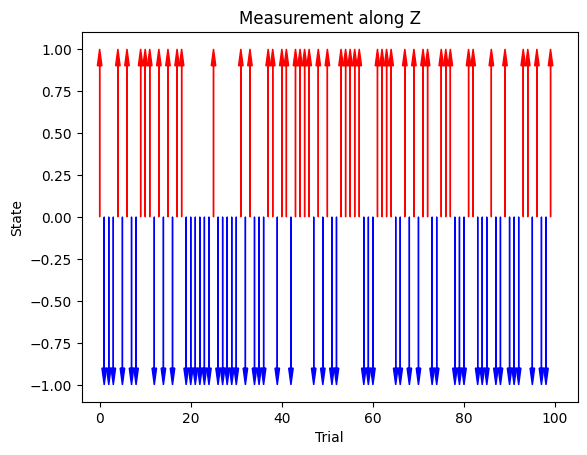

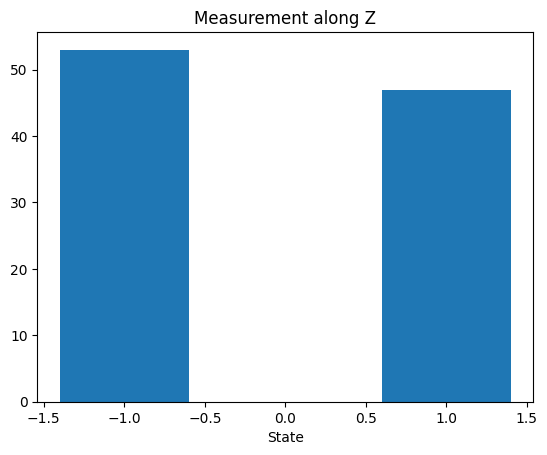

In [804]:
from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')

#Get the final state from the simulation
psi_final = result.states[-1]

for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is the final state and the basis is along Z.
  '''
  value, new_state = measure(psi_final, sigmaz())
  results[round(value)] += 1
  if value > 0: 
    # axes.plot(i, value,'.r')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    # axes.plot(i, value,'.b')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
#Autoscale axes by manually plotting farthest extent of plot
axes.plot(1, 1,'.w')
axes.plot(trials, -1,'.w')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()

##Measurement Uncertainty

Let's plot the same rotation but now use QuTiP to simulate the randomness of the measurement. Allowing the same slightly misbalanced 50/50 split we see for the final time step to be shown for ALL of the time steps. 


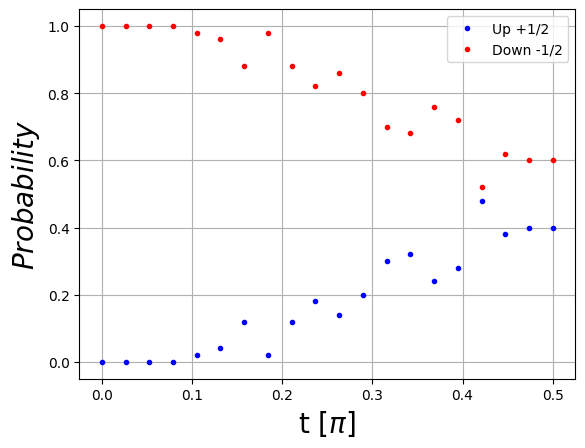

In [805]:
'''
Run simluation of rotation of vector state psi0 by Hamiltonian H for list in times
'''
H = sigmax()/2
times=np.linspace(0,pi/2,20) #just a pi/2 rotation
result = mesolve(H, psi0, times, [], [])

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes
trials = 50
measured_up = []
measured_dn = []
for i in range(len(times)):
  for _ in range(trials):
    value, new_state = measure(result.states[i], sigmaz())
    results[round(value)] += 1
  # print(results[1.0]/100)
  # print(result.states[i])
  # print(i)
  measured_up.append(results[1.0]/trials)
  measured_dn.append(results[-1.0]/trials)
  results = {1.0: 0, -1.0: 0}

'''
Plot
'''
fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(times/pi, measured_up,'.b')
axes.plot(times/pi, measured_dn,'.r')

axes.set_xlabel(r't $[\pi ]$', fontsize=20)
axes.set_ylabel(r'$Probability$', fontsize=20);
axes.legend(("Up +1/2", "Down -1/2"));
plt.grid()

# What does *'real'* quantum data look like?

This is actually *very similar* to what real data from a qubit would look like in practice.

It is important to emphasize that we're plotting the probability of measuring each spin state. Actually we're only ever measuring up or down, because the states are quantized. Indeed this is a very fundamental aspect of quantum states, they have no intermediates, but they can have equal probabilities. 

 Another way to plot the data is to show each measurement as a datapoint that is either up or down. Only when we average them together do we see the 50/50 split. This is very similar to flipping a coin that can never stand on edge. It must always fall heads or tails, but when we flip it we find we can have an equal chance of it being heads and it being tails. 

Lets extend the time of the rotation so that it flips around a few times before stopping at an equal superposition of up and down. 

In [806]:
H = sigmax()/2
times=np.linspace(0,2.5*pi,50) #2 and one half rotation
result = mesolve(H, psi0, times, [], [])

print(H)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]


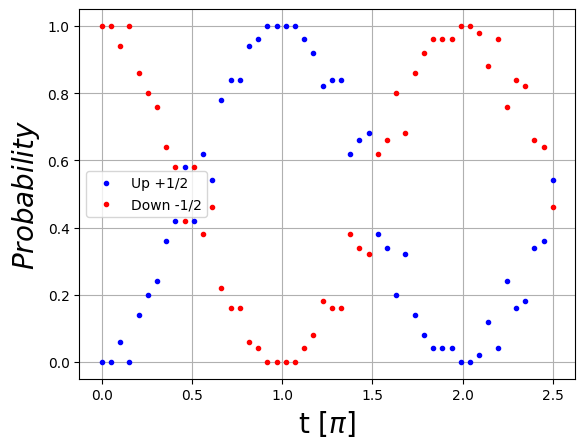

In [807]:
# Run simluation of rotation of vector state psi0 by Hamiltonian H for list in times
H = sigmax()/2
times=np.linspace(0,2.5*pi,50) #2 and one half rotation
result = mesolve(H, psi0, times, [], [])

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes
trials = 50
measured_up = []
measured_dn = []
for i in range(len(times)):
  for _ in range(trials):
    value, new_state = measure(result.states[i], sigmaz())
    results[round(value)] += 1
  # print(results[1.0]/100)
  # print(result.states[i])
  # print(i)
  measured_up.append(results[1.0]/trials)
  measured_dn.append(results[-1.0]/trials)
  results = {1.0: 0, -1.0: 0}

#Plot
fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(times/pi, measured_up,'.b')
axes.plot(times/pi, measured_dn,'.r')

axes.set_xlabel(r't $[\pi ]$', fontsize=20)
axes.set_ylabel(r'$Probability$', fontsize=20);
axes.legend(("Up +1/2", "Down -1/2"));
plt.grid()

REMEMBER: 
##We're only getting  up or down for each trial of each time step. 

100 trials for time step 1. 

100 trials for time step 2. 

etc. 

etc. 

We can plot just the raw up or down measurements for all time steps like this:

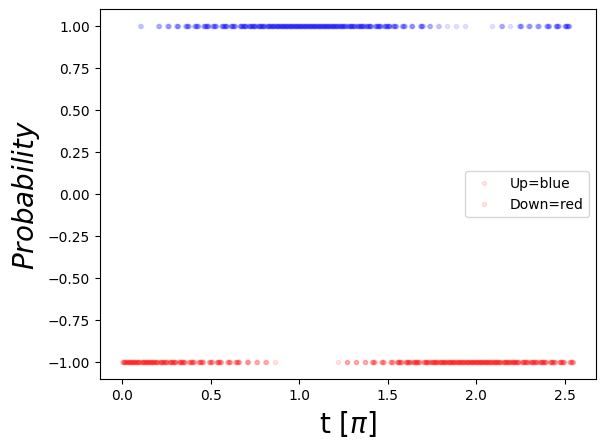

In [808]:
fig, axes = plt.subplots(1,1)
plt.style.use('default')
trials = 20
alphaset = 2 / trials
for i in range(len(times)):
  for itrial in range(trials):
    if measured_up[i]*trials>itrial:
      axes.plot((times[i]+itrial/trials*times[1])/pi, 1,'.b', alpha=alphaset)
      # plt.arrow((times[i]),0.5,0,+measured_up[i]/2, linewidth=3,head_width=0.1, head_length=0.05, fc='b', ec='b', length_includes_head = 1, alpha=alphaset)
    else:
      axes.plot((times[i]+itrial/trials*times[1])/pi, -1,'.r', alpha=alphaset)
      # plt.arrow((times[i]),0.5,0,-measured_dn[i]/2, linewidth=3,head_width=0.1, head_length=0.05, fc='r', ec='r', length_includes_head = 1, alpha=alphaset)
      
  # axes.plot(times*1e6, measured_dn,'.r')

axes.set_xlabel(r't [$\pi$]', fontsize=20)
axes.set_ylabel(r'$Probability$', fontsize=20);
axes.legend(("Up=blue", "Down=red"));


If we want to see the probability of getting each state we can superimpose a vector with a magnitidue = the probability of measuring each direction. 


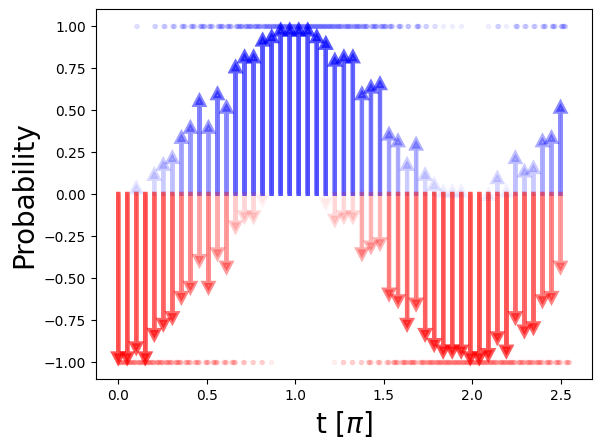

In [809]:
fig, axes = plt.subplots(1,1)
plt.style.use('default')
trials = 20
alphaset = 1/ trials
for i in range(len(times)):
  for itrial in range(trials):
    if measured_up[i]*trials>itrial:
      axes.plot((times[i]+itrial/trials*times[1])/pi, 1,'.b', alpha=alphaset)
      plt.arrow((times[i])/pi,0,0,+measured_up[i], linewidth=3,head_width=0.05, head_length=0.05, fc='b', ec='b', length_includes_head = 1, alpha=alphaset)

    else:
      axes.plot((times[i]+itrial/trials*times[1])/pi, -1,'.r', alpha=alphaset)
      plt.arrow((times[i])/pi,0,0,-measured_dn[i], linewidth=3,head_width=0.05, head_length=0.05, fc='r', ec='r', length_includes_head = 1, alpha=alphaset)
      
  # axes.plot(times*1e6, measured_dn,'.r')

axes.set_xlabel(r't [$\pi$]', fontsize=20)
axes.set_ylabel(r'Probability', fontsize=20);
# axes.legend(("Up=blue", "Down=red"),loc=2);


#Exercises 

###Exercise 1 : 

Time Dependent Schrödinger equation

### $ \mathrm{i} \hbar \frac{d}{d t} | \,\psi (t) \rangle = \hat{H} | \,\psi (t) \rangle $

Which, if $\hat{H}$ is constant in time, has the solution:

### $ |\Psi (t)\rangle =e^{-i{\hat {H}}t/\hbar }|\Psi (0)\rangle$


Verify this is a solution (show your work by hand).

### Exercise 2:
In a few sentences explain if measuring along each basis simultaneously is physically possible. Why or why not?

E2 Answer: 

It is not possible. Because when trying to measure the state in certain basis, saying for example basis x, the state just goes into |±x⟩, and the feature of other two basis y and z just become ‘not significant’.

In other words, for instance the S-G experiment, when we measure in Sz basis we have 1/2 spin up in direction of z and 1/2 spin down in direction of z. When measure in Sx and Sy for the same group of electron, we have 1/2 up and 1/2 down in x and y respectively. But we can't simultaneously have it in all |±x⟩,|±y⟩ and |±z⟩ states when **measuring** .



###Exercise 3:  

Recreate the rotation/gate sequence of the Mach Zehnder interferometer for the case of:

*   No phase shifter/delay

1.   Beam splitter
2.   Beam splitter

Show the state on the Bloch sphere after each rotation.

In [810]:
bs = 1/sqrt(2)*(1.0j*sigmax()+qeye(2))
mirror = sigmax()
plusz = spin_state(1/2,1/2)
minusz = spin_state(1/2,-1/2)

plusoutput = plusz.dag()*bs*mirror*bs*plusz
minusoutput = minusz.dag()*bs*mirror*bs*plusz

print(plusoutput)
print(minusoutput)
# Try with z. 

# Plus Z : plusoutput is the same with phase change 'i'
# Minus Z : minusoutput is zero.

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.+1.j]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.70710678j]
 [0.+0.70710678j]]


/usr/local/lib/python3.7/dist-packages/qutip/bloch.py:616: RuntimeWarning:

invalid value encountered in true_divide



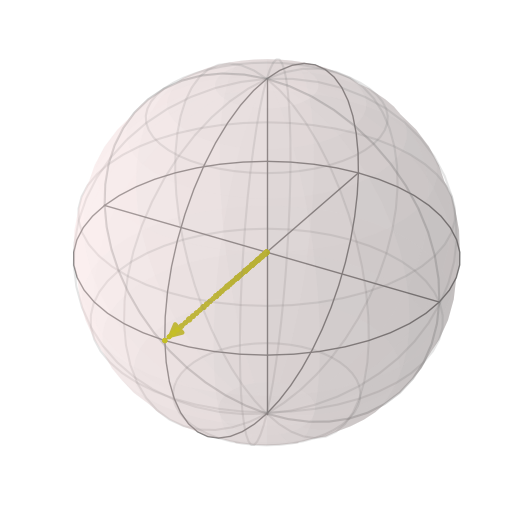

In [811]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','b'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
# b.ylabel = ['y $ \circlearrowleft $', '']
# b.zlabel = ['z $ \circlearrowleft $', '' ]

'''
Initialize a super position state (+X state)
'''
psi0 = 1/sqrt(2)*spin_state(1/2, -1/2)+1/sqrt(2)*spin_state(1/2,1/2)
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = bs*mirror*bs

#Loop - to plot points along rotation arc

delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation about ***X axis*** in steps
  psi1 = Rotation*delta[i] * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

# psi1 = Rotation* psi0

#Add final vector to Bloch sphere
b.add_states(psi1)

print(psi1)

b.render()


###Exercise 4: 

Recreate the rotation/gate sequence of the Mach Zehnder interferometer for:

*    π phase shift in one beam path

1.   Beam splitter
2.   Phase delay
3.   Beam splitter

Show the state after each rotation. 


In [812]:
bs = 1/sqrt(2)*(1.0j*sigmax()+qeye(2))

mirror = sigmax()

theta = pi

plusz = spin_state(1/2,1/2)
minusz = spin_state(1/2,-1/2)

pplus = plusz*plusz.dag()
# pminus = minusz*minusz.dag()
w = exp(1.0j*theta)

phasedelay = w*pplus

plusoutput = plusz.dag()*bs*mirror*phasedelay*bs*plusz
minusoutput = minusz.dag()*bs*mirror*phasedelay*bs*plusz


print(plusoutput)
print(minusoutput)

# Try with plusz input. 

# Now the output (intensity? MZI) are equal in both states. 

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.-0.5j]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.5]]



###Exercise 5: 

Start with the opposite state as in exercise 4 and recreate the rotation/gate sequence of the Mach Zehnder interferometer for:

*    π phase shift in one beam path

Show the state after each rotation. 



In [813]:
bs = 1/sqrt(2)*(1.0j*sigmax()+qeye(2))

mirror = sigmax()

theta = pi

plusz = spin_state(1/2,1/2)
minusz = spin_state(1/2,-1/2)

pplus = plusz*plusz.dag()
# pminus = minusz*minusz.dag()
w = exp(1.0j*theta)

phasedelay = w*pplus

plusoutput = plusz.dag()*bs*mirror*phasedelay*bs*minusz
minusoutput = minusz.dag()*bs*mirror*phasedelay*bs*minusz


print(plusoutput)
print(minusoutput)

# Try with minusz input. 

# The output (intensity? MZI) are also equal in both states, but with a 'i' phase change from the result above.

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.-0.5j]]


###Exercise 6:

Modify the cell below to create a qubit circuit for the rotation sequence in exercise 4. 

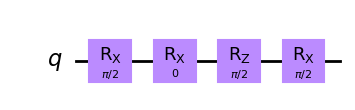

In [814]:
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector
from kaleidoscope import bloch_sphere

sim = QasmSimulator() #Set simulator to evolve state

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(1)

'''
Apply rotation gates to qubit '0' (in units of pi)

#Rotation about X by pi
qc.rx( pi , 0)

#Rotation about Z by pi/2
qc.rz( pi/2 , 0)

'''
qc.rx( pi/2 ,0)  # BS
qc.rx(0 ,0) # MIRROR
qc.rz( pi/2, 0) # PHASEDELAY
qc.rx( pi/2 ,0) # BS

# Draw the circuit
qc.draw('mpl')

In [815]:
compiled_circuit = transpile(qc, sim) #Compile quantum circuit
qc.save_statevector() #Save the state vector after simulation

'''
Run the simulation
'''
job = sim.run(qc, shots=100)

#Plot final states on Bloch spheres
bloch_sphere(job.result().get_statevector(qc))


### Exercise 7:

Look back at the section 'Unitary' right after exercise 1. 

Create a non-unitary operator and show that it is non-unitary acting on a two different states (in different bases) from the Bloch sphere. Show your work by hand and plotted on the Bloch sphere.

In [816]:
nonunitary = pplus
print(nonunitary)
print(nonunitary.dag()*nonunitary)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]]]


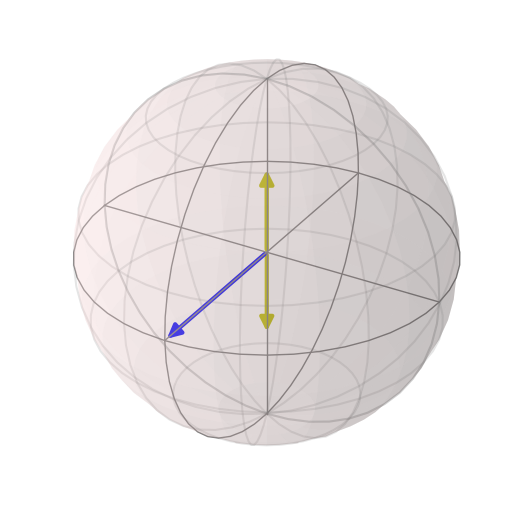

In [817]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','b'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
# b.ylabel = ['y $ \circlearrowleft $', '']
# b.zlabel = ['z $ \circlearrowleft $', '' ]

'''
Initialize a super position state (+X state)
'''
psipz = 1/sqrt(2)*spin_state(1/2, 1/2)
psimz = 1/sqrt(2)*spin_state(1/2,-1/2)
psimx = 1/sqrt(2)*spin_state(1/2, 1/2)+1/sqrt(2)*spin_state(1/2,-1/2)
psipx = 1/sqrt(2)*spin_state(1/2, 1/2)-1/sqrt(2)*spin_state(1/2,-1/2)
print([psipz, psimz, psimx, psipx])

#Add initial vector to Bloch sphere
b.add_states([psipz, psimz, psimx, psipx])

# Twice as much rotation about the Bloch Sphere
Rotation = nonunitary

#Loop - to plot points along rotation arc


psi1 = Rotation*psipz
psi2 = Rotation*psimz
psi3 = Rotation*psipx
psi4 = Rotation*psimx


#Add final vector to Bloch sphere
b.add_states([psi1, psi2, psi3, psi4])

print([psi1, psi2, psi3, psi4])

b.render()

### Exercise 8: 

Modify the angle of the Z rotation from exercise 4 such that the final state is in a superposition. 

Perform a measurement on this final state and confirm that it is an equal superposition. 

In [818]:
bs = 1/sqrt(2)*(1.0j*sigmax()+qeye(2))

mirror = sigmax()

theta1 = 2*pi
theta2 = 2*pi

plusz = spin_state(1/2,1/2)
minusz = spin_state(1/2,-1/2)

pplus = plusz*plusz.dag()
pminus = minusz*minusz.dag()
w = exp(1.0j*theta1)
v = exp(1.0j*theta2)

phasedelay = w*pplus

finalstate = bs*mirror*phasedelay*bs*plusz 

plusoutput = (plusz.dag()*finalstate)
minusoutput = (minusz.dag()*finalstate)

probplus = expect(pplus,finalstate)
probminus = expect(pminus,finalstate)

print(probplus)
print(probminus)

# Try with plusz input. 

# Now the output (intensity? MZI) are equal in both states. 

0.2499999999999999
0.2499999999999999


#End of Lab 2


References:

https://qutip.org/docs/latest/guide/guide-states.html#qubit-two-level-systems

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

Pulse-level noisy quantum circuits with QuTiP 
https://arxiv.org/abs/2105.09902v2